In [8]:
import math
import numpy as np
import random as rand
from numba import jit,int64,float64
import matplotlib.pyplot as plt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Color-blind friendly colors to plot:
CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#Running the script with parameter definitions and functions:
%run populations_functions.py

K = 1; 0.5*dg/dt = 1250.0
D = 50.0; 0.5*dg**2/dt = 500.00000000000006


<Figure size 432x288 with 0 Axes>

In [24]:
#Let's try to find average colony fitness over many sugars:
sugars_arr = np.logspace(np.log10(60),np.log10(430),num=8)
g_opt_arr = np.zeros_like(sugars_arr)

for sug_idx in range(len(sugars_arr)):
    g_opt_arr[sug_idx] = g[np.argmax(fitness(g,sugars_arr[sug_idx],delta))]
    
#Entropy of sugars:
p_sug = np.ones_like(sugars_arr)
p_sug = p_sug/np.sum(p_sug)

Text(0.5, 1.0, 'Opt. expression for different environments')

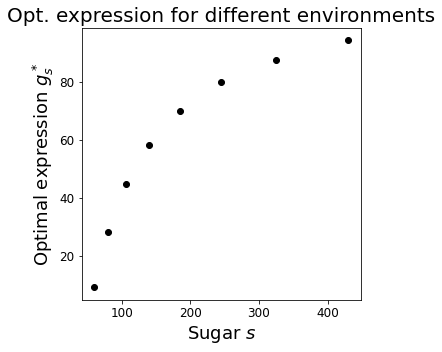

In [25]:
fig,ax = plt.subplots(1,1,figsize=[5,5])
ax.scatter(sugars_arr,g_opt_arr,color='k',marker='o')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Sugar $s$',fontsize=18)
ax.set_ylabel(r'Optimal expression $g^*_s$',fontsize=18)
ax.set_title('Opt. expression for different environments',fontsize=20)
# fig.savefig(f"4a_gopt_vs_s.pdf",format="pdf",dpi=1200,bbox_inches="tight",pad_inches=0.05)

In [47]:
alpha = 2

#Now the unregulated dist:
p0_unreg_sug = Gaussian(g,g_peak,np.maximum(np.sqrt(alpha*g_peak),1))
p0_unreg_sug = p0_unreg_sug/np.trapz(p0_unreg_sug,dx=dg)

#The regulated distributions:
p0_reg_sug = np.zeros((len(g_opt_arr),len(g)))

for g_opt_idx in range(len(g_opt_arr)):
    p0_reg_sug[g_opt_idx] = Gaussian(g,g_opt_arr[g_opt_idx],np.maximum(np.sqrt(alpha*g_opt_arr[g_opt_idx]),1))
    p0_reg_sug[g_opt_idx] = p0_reg_sug[g_opt_idx]/np.trapz(p0_reg_sug[g_opt_idx],dx=dg)
    
marg_p0_reg = np.average(p0_reg_sug,axis=0,weights=p_sug)

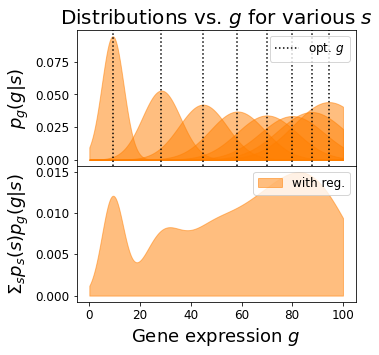

In [48]:
fig,ax = plt.subplots(2,1,figsize=[5,5],sharex=True)

ax[0].fill_between(g,p0_reg_sug[0],color=CB_colors[1],alpha=0.5)
ax[0].axvline(x=g_opt_arr[0],color='k',ls=':',label='opt. $g$')

for g_opt_idx in range(1,len(g_opt_arr)):
    ax[0].fill_between(g,p0_reg_sug[g_opt_idx],color=CB_colors[1],alpha=0.5)
    ax[0].axvline(x=g_opt_arr[g_opt_idx],color='k',ls=':')
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].tick_params(axis='both', which='minor', labelsize=10)
ax[0].set_ylabel('$p_g(g|s)$',fontsize=18)
ax[0].set_title('Distributions vs. $g$ for various $s$',fontsize=20)
ax[0].legend(loc='upper right',fontsize=12)
    
ax[1].fill_between(g,marg_p0_reg,color=CB_colors[1],alpha=0.5,label='with reg.')
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='minor', labelsize=10)
ax[1].set_xlabel('Gene expression $g$',fontsize=18)
ax[1].set_ylabel(r'$\Sigma_s p_s(s) p_g(g|s)$',fontsize=18)
ax[1].legend(loc='best',fontsize=12)

plt.subplots_adjust(hspace=0)

# fig.savefig(f"4a_p(g)_vs_g_for_s.pdf",format="pdf",dpi=1200,bbox_inches="tight",pad_inches=0.05)

In [49]:
cont_entropy(marg_p0_reg)

6.5586968809402455

In [50]:
cond_ent_g_s = 0
for sug_idx in range(len(sugars_arr)):
    cond_ent_g_s = cond_ent_g_s + (p_sug[sug_idx]*cont_entropy(p0_reg_sug[sug_idx]))

print(cond_ent_g_s)

                                   

5.149692195100938


In [51]:
cont_entropy(marg_p0_reg) - cond_ent_g_s

1.4090046858393075